# Loan Prediction Based on Customer Behavior

dataset link: https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior

### Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Import file

In [2]:
train = pd.read_csv('D:\Data Science - Rakamin\Bootcamp\Dataset\Final Project\Loan Prediction\Training Data.csv')
test = pd.read_csv('D:\Data Science - Rakamin\Bootcamp\Dataset\Final Project\Loan Prediction\Test Data.csv')

In [3]:
train_ori = train.copy()

### Descriptive statistics

In [4]:
# check columns name and null value in dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
print('Train:',train.shape)
print('Test:',test.shape)

Train: (252000, 13)
Test: (28000, 12)


In [6]:
# delete strage value in state column
train['STATE'] = train['STATE'].str.replace('\d+','')
train['STATE'] = train['STATE'].str.replace('[','')
train['STATE'] = train['STATE'].str.replace(']','')

# delete strage value in city column
train['CITY'] = train['CITY'].str.replace('\d+','')
train['CITY'] = train['CITY'].str.replace('[','')
train['CITY'] = train['CITY'].str.replace(']','')

- Semua data lengkap. Tidak ditemukan data yang kosong/null
- Terdapat 252000 baris dan 13 kolom

In [7]:
# separate between numerical and categorical value
nums = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
cats = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','Risk_Flag']

In [8]:
# descriptive statistics numerical value
train[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0


- Persebaran data numerik berdistribusi normal
- Tidak ada perbedaan nilai yang signifikan antara rata-rata dan median pada setiap kolom numerik

In [9]:
# descriptive statistics categorical value
train[cats].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Risk_Flag,252000.0,0.123,0.328438,0.0,0.0,0.0,0.0,1.0


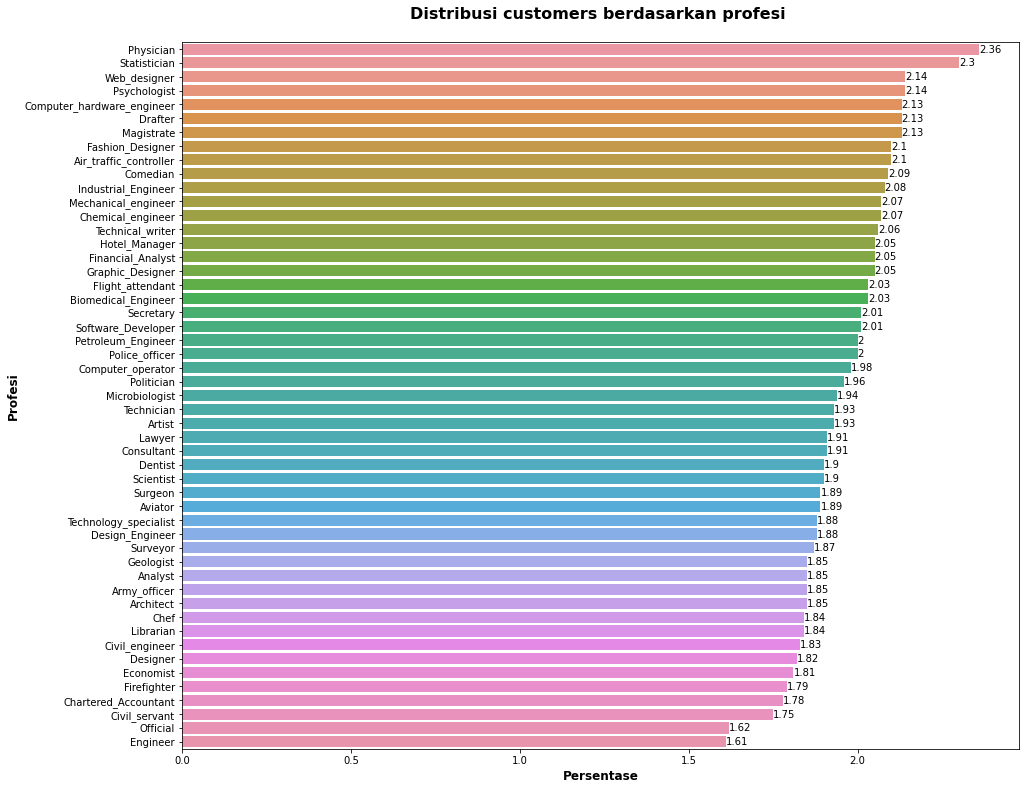

In [10]:
plt.figure(figsize=(15,13))
count_riskprof = round(((train['Profession'].value_counts()/252000)*100),2)
riskprof = sns.barplot(y=count_riskprof.index,x=count_riskprof,orient='h');
for i in riskprof.containers:
    riskprof.bar_label(i,)

plt.title('Distribusi customers berdasarkan profesi \n',fontsize=16,fontweight='bold');
plt.xlabel('Persentase', fontsize=12, fontweight='bold');
plt.ylabel('Profesi', fontsize=12, fontweight='bold');

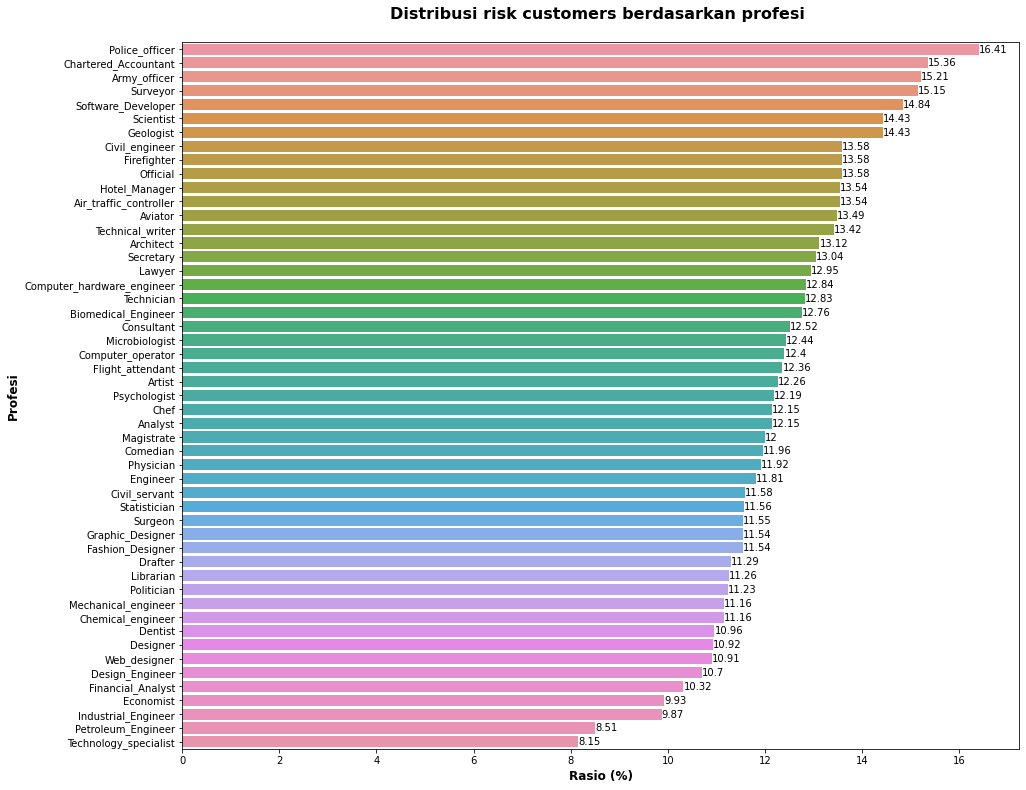

In [11]:
plt.figure(figsize=(15,13))
count_prof = round(((train[train['Risk_Flag']==1]['Profession'].value_counts()/train['Profession'].value_counts())*100),2).sort_values(ascending=False)
prof = sns.barplot(y=count_prof.index,x=count_prof,orient='h');
for i in prof.containers:
    prof.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan profesi \n',fontsize=16,fontweight='bold');
plt.xlabel('Rasio (%)', fontsize=12, fontweight='bold');
plt.ylabel('Profesi', fontsize=12, fontweight='bold');

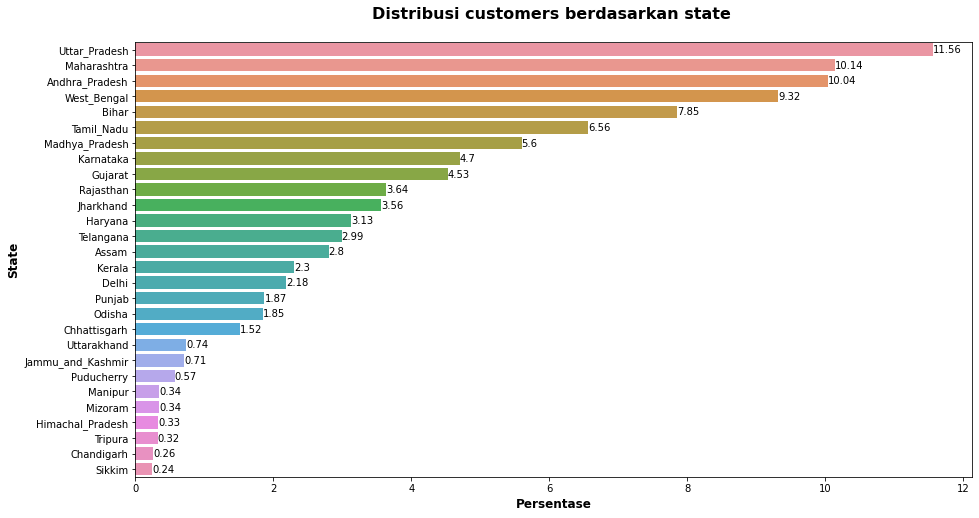

In [12]:
plt.figure(figsize=(15,8))
count_state = round(((train['STATE'].value_counts()/252000)*100),2)
state = sns.barplot(y=count_state.index,x=count_state,orient='h');
for i in state.containers:
    state.bar_label(i,)

plt.title('Distribusi customers berdasarkan state \n',fontsize=16,fontweight='bold');
plt.xlabel('Persentase', fontsize=12, fontweight='bold');
plt.ylabel('State', fontsize=12, fontweight='bold');

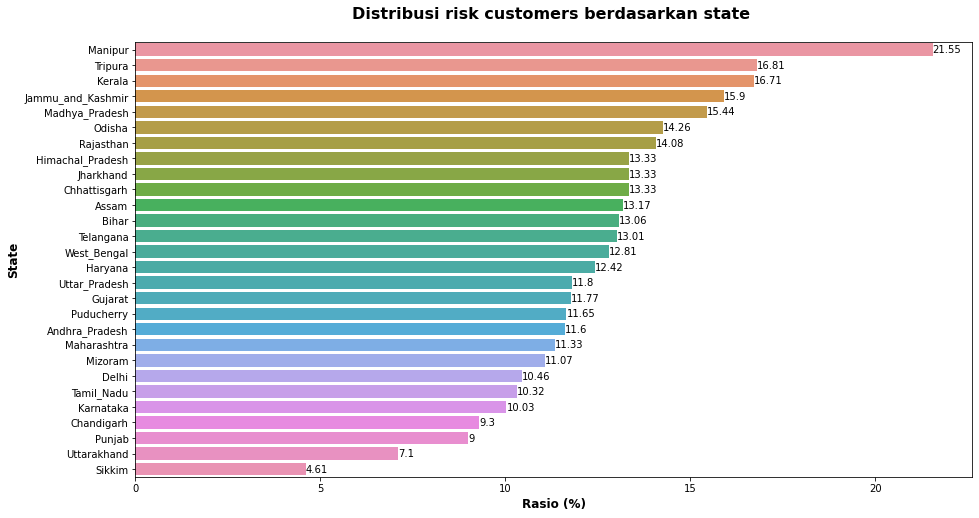

In [13]:
plt.figure(figsize=(15,8))
count_riskstate = round(((train[train['Risk_Flag']==1]['STATE'].value_counts()/train['STATE'].value_counts())*100),2).sort_values(ascending=False)
riskstate = sns.barplot(y=count_riskstate.index,x=count_riskstate,orient='h');
for i in riskstate.containers:
    riskstate.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan state \n',fontsize=16,fontweight='bold');
plt.xlabel('Rasio (%)', fontsize=12, fontweight='bold');
plt.ylabel('State', fontsize=12, fontweight='bold');

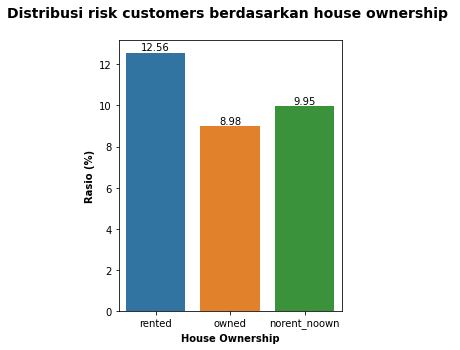

In [14]:
plt.figure(figsize=(4,5))
count_riskhouse = round(((train[train['Risk_Flag']==1]['House_Ownership'].value_counts()/train['House_Ownership'].value_counts())*100),2)
riskhouse = sns.barplot(x=count_riskhouse.index,y=count_riskhouse,orient='v');
for i in riskhouse.containers:
    riskhouse.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan house ownership \n',fontsize=14,fontweight='bold');
plt.xlabel('House Ownership', fontsize=10, fontweight='bold');
plt.ylabel('Rasio (%)', fontsize=10, fontweight='bold');

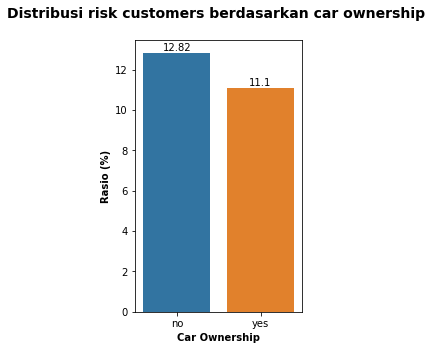

In [15]:
plt.figure(figsize=(3,5))
count_riskcar = round(((train[train['Risk_Flag']==1]['Car_Ownership'].value_counts()/train['Car_Ownership'].value_counts())*100),2)
riskcar = sns.barplot(x=count_riskcar.index,y=count_riskcar,orient='v');
for i in riskcar.containers:
    riskcar.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan car ownership \n',fontsize=14,fontweight='bold');
plt.xlabel('Car Ownership', fontsize=10, fontweight='bold');
plt.ylabel('Rasio (%)', fontsize=10, fontweight='bold');

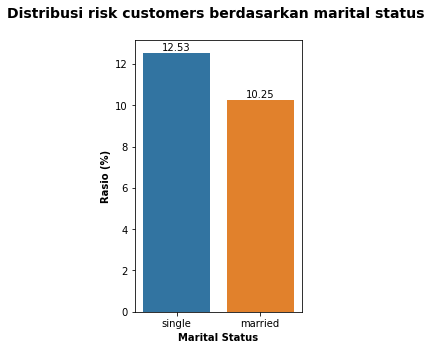

In [16]:
plt.figure(figsize=(3,5))
count_riskmarital = round(((train[train['Risk_Flag']==1]['Married/Single'].value_counts()/train['Married/Single'].value_counts())*100),2)
riskmarital = sns.barplot(x=count_riskmarital.index,y=count_riskmarital,orient='v');
for i in riskmarital.containers:
    riskmarital.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan marital status \n',fontsize=14,fontweight='bold');
plt.xlabel('Marital Status', fontsize=10, fontweight='bold');
plt.ylabel('Rasio (%)', fontsize=10, fontweight='bold');

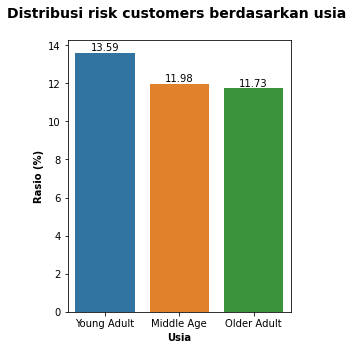

In [17]:
train['Age_group'] = np.where(train['Age']>56, 'Older Adult', np.where(train['Age']>35, 'Middle Age', 'Young Adult'))

plt.figure(figsize=(4,5))
count_riskage = round(((train[train['Risk_Flag']==1]['Age_group'].value_counts()/train['Age_group'].value_counts())*100),2).sort_values(ascending=False)
riskage = sns.barplot(x=count_riskage.index,y=count_riskage);
for i in riskage.containers:
    riskage.bar_label(i,)

plt.title('Distribusi risk customers berdasarkan usia \n',fontsize=14,fontweight='bold');
plt.xlabel('Usia', fontsize=10, fontweight='bold');
plt.ylabel('Rasio (%)', fontsize=10, fontweight='bold');

- Terdapat beberapa value string yang mengandung angka dan kurung siku pada kolom `CITY` dan `STATE` (kemungkinan merupakan data duplicate)
- Sebanyak 12.53% nasabah yang beresiko memiliki status `single`
- Sebagian besar nasabah yang beresiko `menyewa rumah` (12.56%)
- Sebagian besar nasabah yang beresiko `tidak memiliki mobil` (12.82%)
- Nasabah yang beresiko kebanyakan berprofesi `Police_Officer` dengan presentase 16.41% dari total nasabah
- Nasabah yang beresiko kebanyakan berasal dari `Manipur` dengan presentasi 21.55%
- Nasabah yang beresiko kebanyakan berasal dari kelompok usia `Young Adult` <36 th (13.59%)

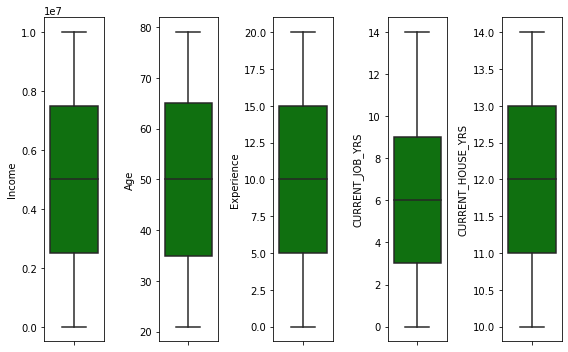

In [18]:
# check outlier with boxplot
plt.figure(figsize=(8,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=train[nums[i]], color='green', orient='v')
    plt.tight_layout()

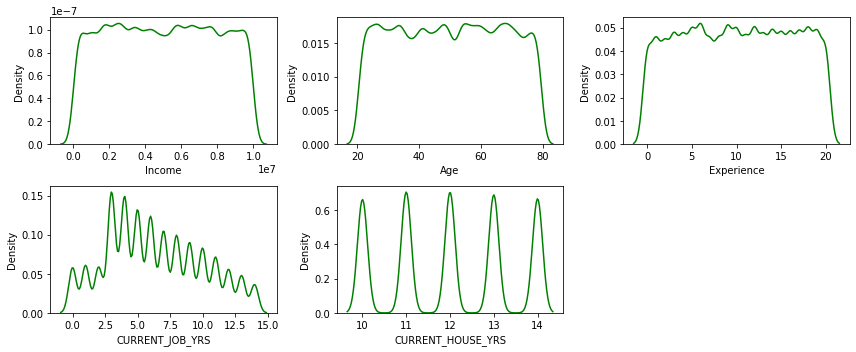

In [19]:
# check distribution with kdeplot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=train[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

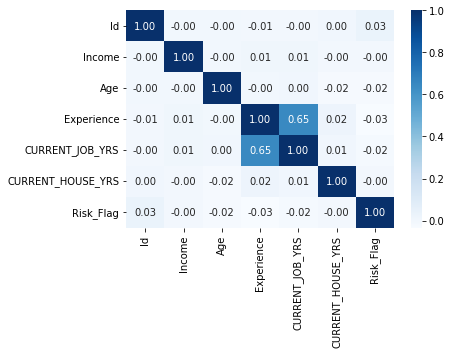

In [20]:
# check correlation for numerical value with pearson's correlation
sns.heatmap(train.corr(), cmap='Blues', annot=True, fmt='.2f');

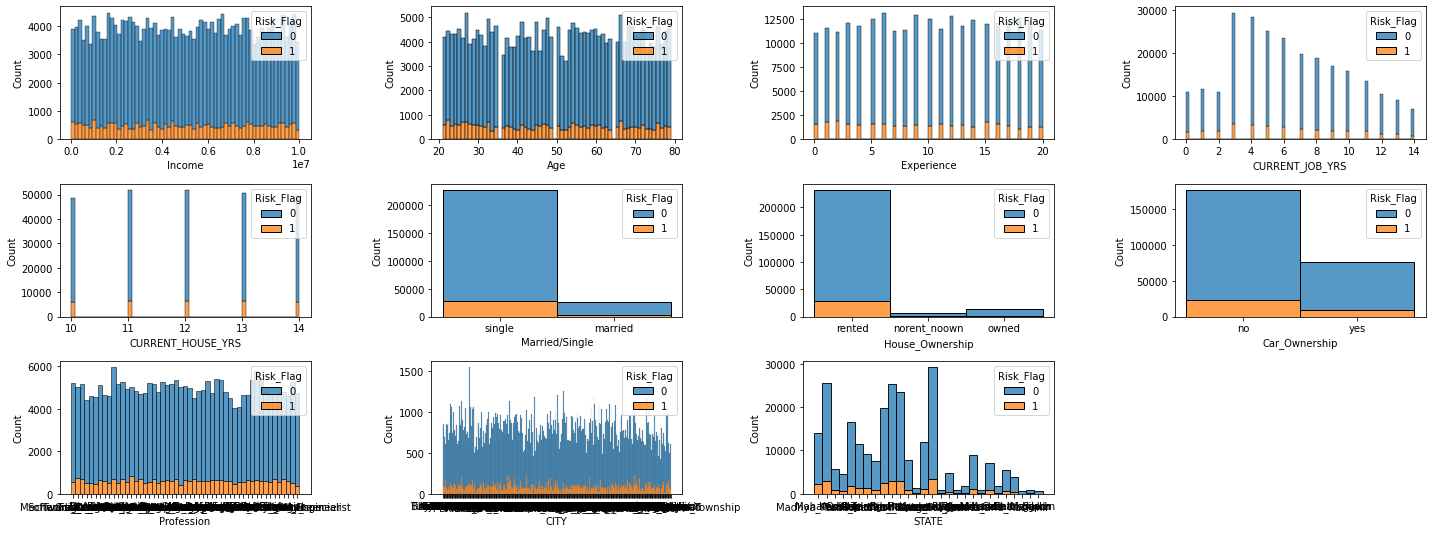

In [21]:
# visualization customer distribution comparison group by risk flag
col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
plt.figure(figsize=(20,12))
for i in range(0, len(col)):
    plt.subplot(5,4, i+1)
    sns.histplot(x=train[col[i]], hue=train['Risk_Flag'], multiple='stack')
    plt.tight_layout()

- Secara visualisasi, data numerik terdistribusi normal dan tidak ada outlier

In [22]:
# check outlier with z-score
print(f'Jumlah baris sebelum memfilter outlier: {len(train)}')

filtered_entries = np.array([True] * len(train))

for col in nums:
    zscore = abs(stats.zscore(train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
train = train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(train)}')

Jumlah baris sebelum memfilter outlier: 252000
Jumlah baris setelah memfilter outlier: 252000


- Tidak ada outlier setelah di cek menggunakan z-score

### Data Cleansing

#### Handle missing values

In [23]:
train2 = train.copy()

In [24]:
# check if there missing value
train2.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Age_group            0
dtype: int64

#### Handle duplicated data

In [25]:
# check if there duplicated data
train2.duplicated().sum()

0

#### Handle outliers

In [26]:
for col in nums:
    zscore = abs(stats.zscore(train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
train2 = train2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#### Feature transformation

In [27]:
# Normalized
train2['Experience'] = MinMaxScaler().fit_transform(train2['Experience'].values.reshape(len(train), 1))
train2['Age'] = MinMaxScaler().fit_transform(train2['Age'].values.reshape(len(train), 1))
train2['Income'] = MinMaxScaler().fit_transform(train2['Income'].values.reshape(len(train), 1))
train2['CURRENT_HOUSE_YRS'] = MinMaxScaler().fit_transform(train2['CURRENT_HOUSE_YRS'].values.reshape(len(train), 1))

#### Feature encoding

In [28]:
# chage categorical string value to integer
mapping_married_single = {'single' : 0,
                          'married' : 1}

mapping_car = {'no' : 0,
               'yes' : 1}


train2['Married/Single'] = train2['Married/Single'].map(mapping_married_single)
train2['Car_Ownership'] = train2['Car_Ownership'].map(mapping_car)

house = pd.get_dummies(train2['House_Ownership'], prefix='ownhouse')
train2 = pd.merge(train2, house, left_index=True, right_index=True)

In [29]:
# label encoding state. sorted by the number of risk customers
State_risk = train2[train2['Risk_Flag']==1].groupby('STATE').agg({'Risk_Flag':'count'}).reset_index()
State_total = train2.groupby('STATE').agg({'Risk_Flag':'count'}).reset_index()
State_sort = State_risk.merge(State_total, on = 'STATE', how = 'inner')
State_sort.rename(columns={'Risk_Flag_x':'Risk_Cust','Risk_Flag_y':'Total_Cust'} ,inplace=True)
State_sort['Ratio'] = State_sort.apply(lambda x : x['Risk_Cust'] / x['Total_Cust'],axis=1)
State_sort = State_sort.sort_values(by='Ratio',ascending=True).reset_index()
numbers = list(range(1,29))
State_sort['State_Rank'] = numbers
train2 = train2.merge(State_sort[['STATE','State_Rank']],on='STATE')

In [30]:
# label encoding profession. sorted by the number of risk customers
Profession_risk = train2[train2['Risk_Flag']==1].groupby('Profession').agg({'Risk_Flag':'count'}).reset_index()
Profession_total = train2.groupby('Profession').agg({'Risk_Flag':'count'}).reset_index()
Profession_sort = Profession_risk.merge(Profession_total, on = 'Profession', how = 'inner')
Profession_sort.rename(columns={'Risk_Flag_x':'Risk_Cust','Risk_Flag_y':'Total_Cust'} ,inplace=True)
Profession_sort['Ratio'] = Profession_sort.apply(lambda x : x['Risk_Cust'] / x['Total_Cust'],axis=1)
Profession_sort = Profession_sort.sort_values(by='Ratio',ascending=True).reset_index()
numbers = list(range(1,52))
Profession_sort['Profession_Rank'] = numbers
train2 = train2.merge(Profession_sort[['Profession','Profession_Rank']],on='Profession')

In [31]:
train2.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_group,ownhouse_norent_noown,ownhouse_owned,ownhouse_rented,State_Rank,Profession_Rank
0,1,0.129487,0.034483,0.15,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,0.75,0,Young Adult,0,0,1,24,10
1,2583,0.228713,0.948276,0.60,0,rented,0,Mechanical_engineer,Satna,Madhya_Pradesh,7,0.75,1,Older Adult,0,0,1,24,10
2,4150,0.946853,0.465517,0.00,0,rented,0,Mechanical_engineer,Satna,Madhya_Pradesh,0,0.50,0,Middle Age,0,0,1,24,10
3,4829,0.275715,0.206897,0.20,0,rented,0,Mechanical_engineer,Bhind,Madhya_Pradesh,4,0.25,0,Young Adult,0,0,1,24,10
4,5366,0.129487,0.034483,0.15,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,0.75,0,Young Adult,0,0,1,24,10


### Feature Engineering

####  Feature selection

In [32]:
# drop unimportant columns
train2 = train2.drop(['Id','House_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','Age_group'], axis=1)
train2.sample()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,ownhouse_norent_noown,ownhouse_owned,ownhouse_rented,State_Rank,Profession_Rank
188948,0.804191,0.62069,0.6,0,0,0.0,0,0,0,1,26,5


In [33]:
# #Export new dataset for modelling
train2.to_csv('D:\Data Science - Rakamin\Bootcamp\Final Project\Data_Train_Model.csv', index=False)